# MNIST image classification using Neural network

*Objective* : Create a neural network to classify the famous mnist images, so that
the internals could be understood. Creating something from scratch, although time-consuming 
can provide more insight and more knowledge on how things work.

Therefore this effort will involve only usage of basic libraries. 

The core of the network is present in network.py which is created while reading through 
Michael Nielsen's excellent book [Neural networks and deep learning][book_url]. Some of the utilities are present in the utility module.

[book_url]: http://neuralnetworksanddeeplearning.com/index.html

**TODO**
1. Use different activation functions : Relu, elu, ...
2. Use dropouts
3. Batch normalization
4. Use Kaiming initialization
5. Deeper architecture
6. SGDR
7. Learning rate finder


## Imports

In [1]:
import numpy as np
import random
import mnist_loader
import network 
from utilities import utility

%matplotlib inline

## Data loading 

In [2]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print(f'training data size: {len(training_data)}')
print(f'validation data size: {len(validation_data)}')
print(f'test data size: {len(test_data)}')

training data size: 50000
validation data size: 10000
test data size: 10000


# Training the neural network

## Model Architecture

* Input Layer size : 784 (28 X 28)
* Hidden layer size : 1 [30] 
* Output layer : 10

* Activations used : sigmoid
* Cost/Loss function : Mean squared error
* Optimizer used : None

First we will begin off with a very basic neural network with 1 hidden layer.

In [3]:
net = network.Network([784, 30, 10])
net.SGD(training_data, epochs=20, mini_batch_size=10, eta=3.0, val_data=validation_data)

Epoch: 0, train err: 0.9089 val err: 0.9150
Epoch: 1, train err: 0.9268 val err: 0.9293
Epoch: 2, train err: 0.9350 val err: 0.9321
Epoch: 3, train err: 0.9424 val err: 0.9393
Epoch: 4, train err: 0.9452 val err: 0.9388
Epoch: 5, train err: 0.9467 val err: 0.9394
Epoch: 6, train err: 0.9478 val err: 0.9419
Epoch: 7, train err: 0.9541 val err: 0.9454
Epoch: 8, train err: 0.9540 val err: 0.9451
Epoch: 9, train err: 0.9551 val err: 0.9458
Epoch: 10, train err: 0.9588 val err: 0.9487
Epoch: 11, train err: 0.9599 val err: 0.9496
Epoch: 12, train err: 0.9601 val err: 0.9487
Epoch: 13, train err: 0.9604 val err: 0.9475
Epoch: 14, train err: 0.9633 val err: 0.9501
Epoch: 15, train err: 0.9643 val err: 0.9472
Epoch: 16, train err: 0.9635 val err: 0.9482
Epoch: 17, train err: 0.9628 val err: 0.9494
Epoch: 18, train err: 0.9652 val err: 0.9512
Epoch: 19, train err: 0.9661 val err: 0.9512
Done


Let's see how our model fares on the test data

In [4]:
net.evaluate(test_data=test_data)

0.9482

Not a great model, but it's not too bad for a first attempt.

# Visualization

Let's take a look at some of the images we misclassified

In [5]:
img_data, title_data = net.getn_misclassified(test_data=test_data)
def plot_gallery(img_data, title_data, n_row=1, n_col=5):
    grid_size = n_row * n_col
    rand = random.randint(0, len(img_data))
    utility.plot_gallery(img_data[rand:rand+grid_size], title_data[rand:rand+grid_size], n_row=n_row, n_col=n_col)

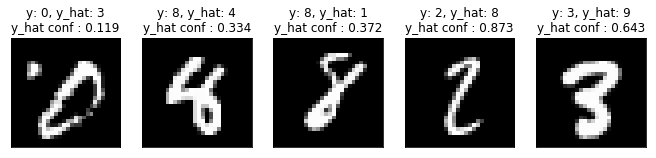

In [6]:
plot_gallery(img_data, title_data)

Hmmm these don't particularly look very hard to distinguish. Let's hope in the next iteration the model would be able to classify better.